## 2D Embeddings

Epoch 0, Loss: 1.2567
Epoch 10, Loss: 0.5640
Epoch 20, Loss: 0.2898
Epoch 30, Loss: 0.1562
Epoch 40, Loss: 0.1070
Epoch 50, Loss: 0.0798
Epoch 60, Loss: 0.0605
Epoch 70, Loss: 0.0456
Epoch 80, Loss: 0.0350
Epoch 90, Loss: 0.0267


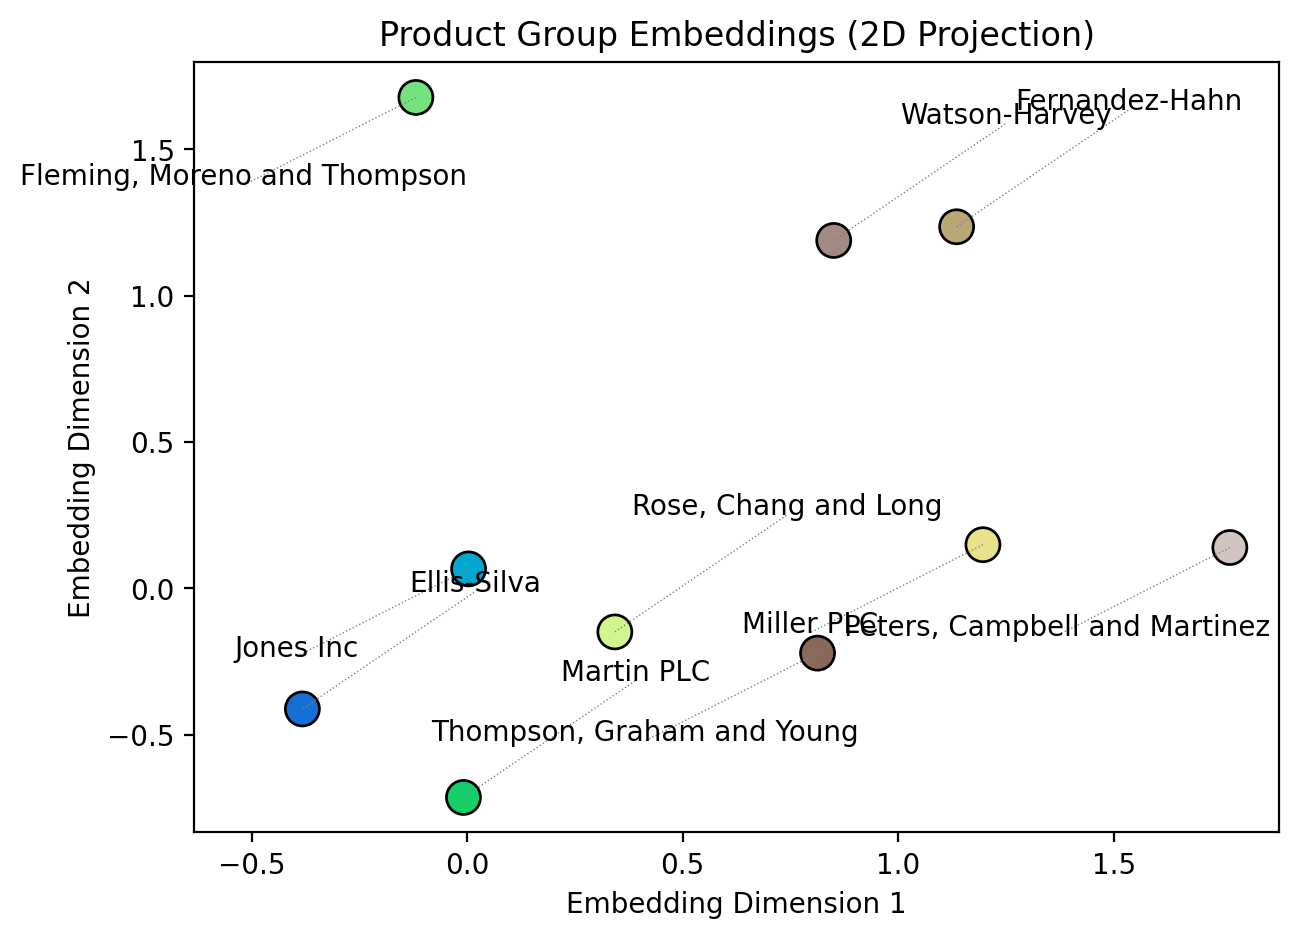

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from faker import Faker
%config InlineBackend.figure_format = 'retina'

np.random.seed(0)
torch.manual_seed(0)

# Create industries with Faker
fake = Faker()

# Generate 10 random industries
industries = [fake.company() for _ in range(10)]

# Define number of features
num_features = 20

# Create DataFrame dynamically
df = pd.DataFrame({
    "industry": industries,
    **{f"feature_{i+1}": np.random.randn(len(industries)) for i in range(num_features)}
})

# Encode product groups into unique indices
product_ids = {product: idx for idx, product in enumerate(df["industry"])}
indices = df["industry"].map(product_ids)

# Convert df_cat features to PyTorch tensor
df_tensor = torch.tensor(df.iloc[:, 1:].values, dtype=torch.float32)

# Define embedding parameters
embedding_dim = 2  
num_products = len(df)

# Trainable embeddings for each product group
product_embeddings = nn.Parameter(torch.randn(num_products, embedding_dim, requires_grad=True))

# Transformation layer (projects feature space into embeddings)
linear_layer = nn.Linear(df_tensor.shape[1], embedding_dim)

# Define loss function & optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam([product_embeddings] + list(linear_layer.parameters()), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Project input features to 2D space
    # projected_embeddings = linear_layer(df_tensor)
    # projected_embeddings = torch.nn.functional.normalize(projected_embeddings, p=2, dim=1)
    projected_embeddings = torch.nn.functional.gelu(linear_layer(df_tensor))
    
    # Compute loss
    loss = loss_fn(projected_embeddings, product_embeddings)
    
    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Extract learned embeddings
learned_embeddings = product_embeddings.detach().numpy()

# Create DataFrame for visualization
df_embedded = pd.DataFrame(learned_embeddings, columns=["dim1", "dim2"])
df_embedded["industry"] = df["industry"]

# Plot the embeddings using Seaborn
plt.figure(figsize=(7, 5))
scatter = sns.scatterplot(
    x="dim1",
    y="dim2",
    hue="industry",
    data=df_embedded,
    palette="terrain",
    edgecolor="black",
    s=150
)

# Add labels with callout lines
for i in range(len(df_embedded)):
    x, y = df_embedded["dim1"][i], df_embedded["dim2"][i]
    label = df_embedded["industry"][i].replace("gl_", "")
    x_offset = 0.4 if i % 2 == 0 else -0.4
    y_offset = 0.4 if i % 2 == 0 else -0.3
    plt.plot([x, x + x_offset], [y, y + y_offset], color='gray', lw=0.5, linestyle='dotted')
    plt.text(x + x_offset, y + y_offset, label, fontsize=10, ha='center')

# Titles and labels
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.title("Product Group Embeddings (2D Projection)")
plt.legend([],[], frameon=False)
plt.show()

# 3D Embedding

Epoch 0, Loss: 0.8013
Epoch 10, Loss: 0.5071
Epoch 20, Loss: 0.3523
Epoch 30, Loss: 0.2732
Epoch 40, Loss: 0.2314
Epoch 50, Loss: 0.1984
Epoch 60, Loss: 0.1708
Epoch 70, Loss: 0.1471
Epoch 80, Loss: 0.1268
Epoch 90, Loss: 0.1095


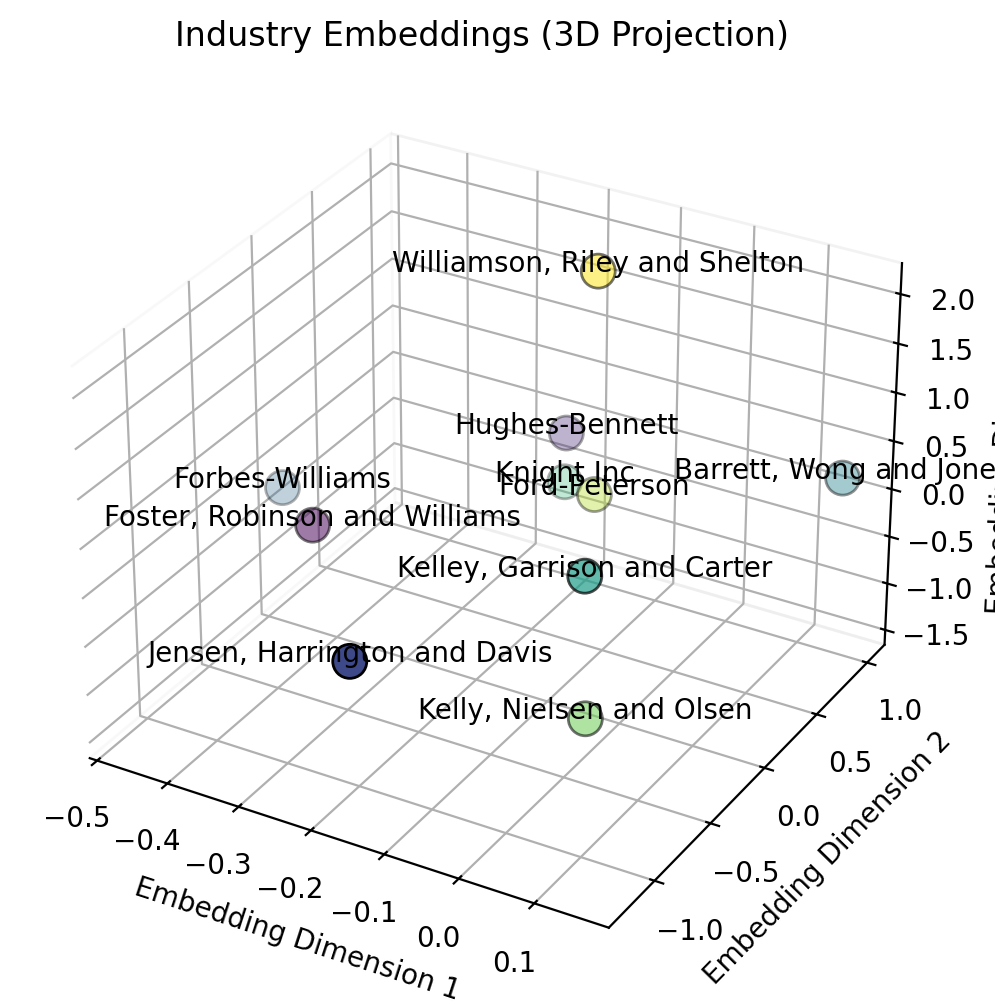

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting
%config InlineBackend.figure_format = 'retina'

np.random.seed(0)
torch.manual_seed(0)

# Create industries with Faker
fake = Faker()

# Generate 10 random industries
industries = [fake.company() for _ in range(10)]

# Create DataFrame dynamically
df = pd.DataFrame({
    "industry": industries,
    **{f"feature_{i+1}": np.random.randn(len(industries)) for i in range(num_features)}
})

# Encode industries into unique indices
industry_ids = {industry: idx for idx, industry in enumerate(df["industry"])}
indices = df["industry"].map(industry_ids)

# Convert df features to PyTorch tensor
df_tensor = torch.tensor(df.iloc[:, 1:].values, dtype=torch.float32)

# Define embedding parameters
embedding_dim = 3  # Now projecting into 3D space
num_industries = len(df)

# Trainable embeddings for each industry
industry_embeddings = nn.Parameter(torch.randn(num_industries, embedding_dim, requires_grad=True))

# Transformation layer (projects feature space into 3D)
linear_layer = nn.Linear(df_tensor.shape[1], embedding_dim)

# Define loss function & optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam([industry_embeddings] + list(linear_layer.parameters()), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Project input features to 3D space using GELU activation
    projected_embeddings = torch.nn.functional.gelu(linear_layer(df_tensor))

    # Compute loss
    loss = loss_fn(projected_embeddings, industry_embeddings)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Extract learned embeddings
learned_embeddings = industry_embeddings.detach().numpy()

# Create DataFrame for visualization
df_embedded = pd.DataFrame(learned_embeddings, columns=["dim1", "dim2", "dim3"])
df_embedded["industry"] = df["industry"]

# --- 3D Visualization ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot in 3D space
sc = ax.scatter(
    df_embedded["dim1"], df_embedded["dim2"], df_embedded["dim3"], 
    c=np.arange(len(df_embedded)), cmap="viridis", edgecolors="black", s=150
)

# Add labels at data points
for i in range(len(df_embedded)):
    x, y, z = df_embedded.iloc[i, :3]
    label = df_embedded["industry"][i]
    ax.text(x, y, z, label, fontsize=10, ha="center")

# Labels and title
ax.set_xlabel("Embedding Dimension 1")
ax.set_ylabel("Embedding Dimension 2")
ax.set_zlabel("Embedding Dimension 3")
ax.set_title("Industry Embeddings (3D Projection)")

# Make background transparent
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
ax.zaxis.set_tick_params(width=0)

# Make panes transparent
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.show()